# nn classification

In [ ]:
#|default_exp helper

In [ ]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

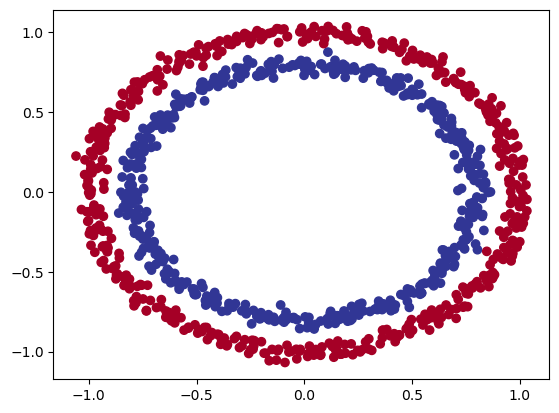

In [ ]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [ ]:
#|export
import torch
import torch.nn as nn

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

torch.Size([800, 2])

2 linear layers without a non-linearity can't solve this problem.

In [ ]:
class CircleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 10)
        self.l2 = nn.Linear(10, 1)
    def forward(self, x):
        return self.l2(self.l1(x))

In [ ]:
class CircleClassifierImproved(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(2, 10)
        self.l2 = nn.Linear(10, 10)
        self.l3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.l1(x)
        x = self.relu(x)

        x = self.l2(x)
        x = self.relu(x)

        x = self.l3(x)
        # x = self.relu(x)

        return x
        # return self.l3(self.relu(self.l2(self.relu(self.l1(x)))))


In [ ]:
nn.BCEWithLogitsLoss()

BCEWithLogitsLoss()

In [ ]:
t = torch.from_numpy(X_train.numpy()).type(torch.float32)

In [ ]:
t

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Half is `float16`, Float is `float32`

In [ ]:
f = nn.Linear(2, 10)(t)

In [ ]:
nn.Linear(2, 10)(t).shape

torch.Size([800, 10])

In [ ]:
# c = CircleClassifier()
c = CircleClassifierImproved()

In [ ]:
c.parameters

<bound method Module.parameters of CircleClassifierImproved(
  (l1): Linear(in_features=2, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=10, bias=True)
  (l3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)>

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
opt = torch.optim.Adam(c.parameters(), lr=0.01)

In [ ]:
tr_loss = []
vl_loss = []

In [ ]:
#|export
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
# training loop
for epoch in range(100):
    c.train()

    y_pred = c(X_train).squeeze()
    act_pred = torch.sigmoid(y_pred).round()
    loss = loss_fn(y_pred, y_train)

    tr_loss.append(loss.detach().numpy())
    acc = accuracy_fn(y_train, act_pred)
    opt.zero_grad()
    loss.backward()
    opt.step()

    c.eval()
    with torch.inference_mode():
        v_pred = c(X_test).squeeze()
        act_pred = torch.sigmoid(v_pred).round()
        vloss = loss_fn(v_pred, y_test)
        vl_loss.append(vloss.detach().numpy())
        test_acc = accuracy_fn(y_test, act_pred)
    print(f"Epoch: {epoch+1:>5} | Loss: {tr_loss[epoch]:.5f}, Accuracy: {acc:.2f}% | Test loss: {vl_loss[epoch]:.5f}, Test acc: {test_acc:.2f}%")

Epoch:     1 | Loss: 0.70613, Accuracy: 50.00% | Test loss: 0.69981, Test acc: 50.00%
Epoch:     2 | Loss: 0.70133, Accuracy: 50.00% | Test loss: 0.69647, Test acc: 50.00%
Epoch:     3 | Loss: 0.69771, Accuracy: 50.00% | Test loss: 0.69404, Test acc: 50.00%
Epoch:     4 | Loss: 0.69492, Accuracy: 50.00% | Test loss: 0.69286, Test acc: 50.00%
Epoch:     5 | Loss: 0.69331, Accuracy: 50.00% | Test loss: 0.69212, Test acc: 50.00%
Epoch:     6 | Loss: 0.69220, Accuracy: 50.00% | Test loss: 0.69157, Test acc: 50.00%
Epoch:     7 | Loss: 0.69131, Accuracy: 50.00% | Test loss: 0.69106, Test acc: 53.50%
Epoch:     8 | Loss: 0.69054, Accuracy: 54.00% | Test loss: 0.69053, Test acc: 67.00%
Epoch:     9 | Loss: 0.68979, Accuracy: 65.50% | Test loss: 0.69007, Test acc: 57.00%
Epoch:    10 | Loss: 0.68913, Accuracy: 58.75% | Test loss: 0.68970, Test acc: 64.00%
Epoch:    11 | Loss: 0.68858, Accuracy: 72.50% | Test loss: 0.68941, Test acc: 60.50%
Epoch:    12 | Loss: 0.68814, Accuracy: 64.50% | Test 

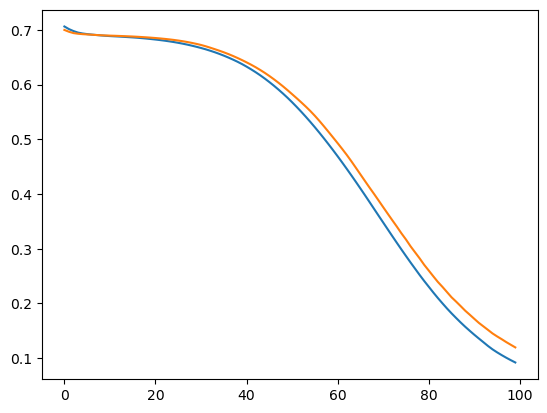

In [ ]:
plt.plot(tr_loss)
plt.plot(vl_loss);

In [ ]:
#|hide
import nbdev; nbdev.nbdev_export()